# Total event energy : cross-check of bokeh, to show that rechits energy is lower in data than simulation

In [1]:
import pandas as pd
import uproot
import os
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np

In [18]:
input_file = '/data_cms_upgrade/cuisset/testbeam18/ntuple-selection/v2/ntuple_selection_sim_proton_v7_em_beamen50_1.root'
#input_file = '/grid_mnt/data_cms_upgrade/cuisset/testbeam18/ntuple-selection/v2/ntuple_selection_data_em_415.root'
for array_i in uproot.iterate(input_file + ":relevant_branches", step_size="100MB", library="ak", filter_name=["event", "ce_clean_*"]):
    array = array_i
    break

In [9]:
df = ak.to_dataframe(array, levelname=lambda i : {0 : "event_minus_one", 1:"rechit_id"}[i]).reset_index(level=1).reset_index(level=0, drop=True).set_index(["event", "rechit_id"])

In [10]:
df

ce_clean_detid  ce_clean_x_unshifted  ce_clean_y_unshifted  \
event rechit_id                                                               
9423  0                16777278              0.000000              2.244192   
      1                16777341             -0.971764              2.805240   
      2                33554557             -0.971764              2.805240   
      3                33554620             -1.943527              3.366288   
      4                50331772             -0.971764              3.927336   
...                         ...                   ...                   ...   
4986  432             436207741             -0.971764              2.805240   
      433             436207867             -2.915291              3.927336   
      434             452984891              0.000000              5.610480   
      435             452985085             -2.915291              1.683144   
      436             452985146             -3.887054              4.488384   

                 ce_clean_z  ce_clean_layer  ce_clean_energy  \
event rechit_id                                                
9423  0           13.877500               1         1.359535   
      1           13.877500               1        20.696630   
      2           14.767500               2        50.925503   
      3           14.767500               2         1.430526   
      4           16.782499               3        11.401217   
...                     ...             ...              ...   
4986  432         50.688000              26         1.309434   
      433         50.688000              26         1.057511   
      434         52.881500              27         2.598599   
      435         52.881500              27         1.675228   
      436         52.881500              27         1.198057   

                 ce_clean_energy_MeV  
event rechit_id                       
9423  0                    15.347791  
      1                   233.644257  
      2                   501.667114  
      3                    14.092113  
      4                   112.313385  
...                              ...  
4986  432                  14.397223  
      433                  11.627335  
      434                  28.982174  
      435                  18.683819  
      436                  13.361929  

[898830 rows x 7 columns]

array([[<Axes: title={'center': 'energy_MeV_sum'}>]], dtype=object)

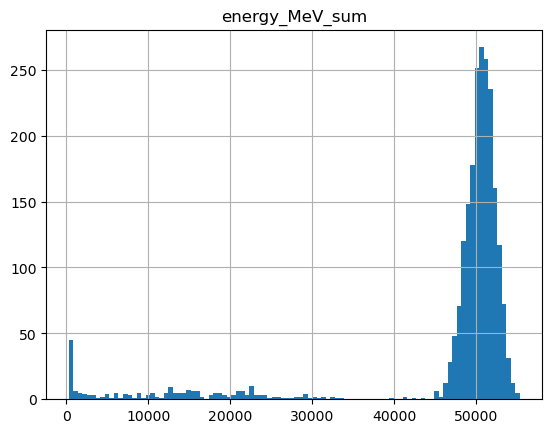

In [23]:
df.groupby("event").agg(
    energy_MeV_sum=pd.NamedAgg(column="ce_clean_energy_MeV", aggfunc="sum")
).hist(bins=100)

In [12]:
def plot(filePath):
    tree = uproot.open(filePath + ":relevant_branches")
    array = tree.arrays( library="ak", filter_name=["event", "ce_clean_energy_MeV"])
    df = ak.to_dataframe(array, levelname=lambda i : {0 : "event_minus_one", 1:"rechit_id"}[i]).reset_index(level=1).reset_index(level=0, drop=True).set_index(["event", "rechit_id"])
    agg = df.groupby("event").agg(
        energy_MeV_sum=pd.NamedAgg(column="ce_clean_energy_MeV", aggfunc="sum")
    )
    print(agg.mean())
    agg.hist(bins=100)

energy_MeV_sum    288518.53125
dtype: float32


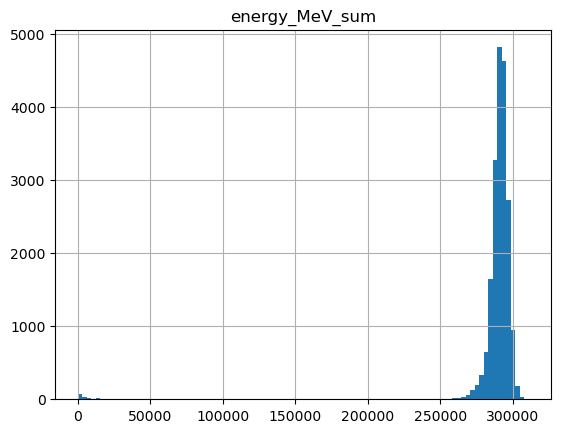

In [13]:
plot('/data_cms_upgrade/cuisset/testbeam18/ntuple-selection/v2/ntuple_selection_sim_proton_v7_em_beamen300_1.root')

energy_MeV_sum    269488.09375
dtype: float32


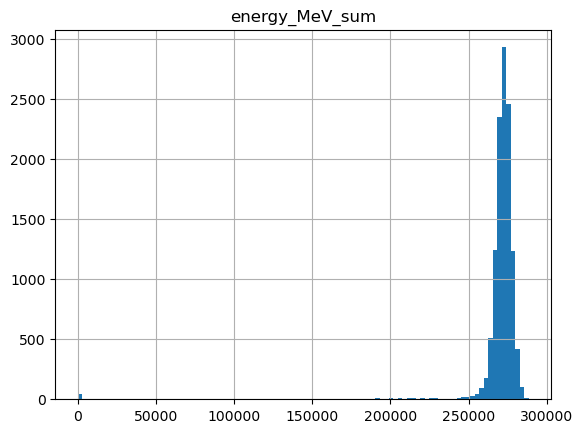

In [14]:
plot('/grid_mnt/data_cms_upgrade/cuisset/testbeam18/ntuple-selection/v2/ntuple_selection_data_em_435.root')